# 1- Gather the Walmart Data (E-commerce Data)



In [ ]:
# load data via kaggle API
!kaggle datasets download -d asahu40/walmart-data-analysis-and-forcasting

Dataset URL: https://www.kaggle.com/datasets/asahu40/walmart-data-analysis-and-forcasting
License(s): CC0-1.0
walmart-data-analysis-and-forcasting.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# unzip the file to get the content
import zipfile
zip_ref = zipfile.ZipFile('/content/walmart-data-analysis-and-forcasting.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# 2- load libraries

In [ ]:
# load the necessary libraries for analysis and data pre-processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# Read Data from CSV
df=pd.read_csv('/content/Walmart Data Analysis and Forcasting.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
# to get the datatype and number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# 3- Pre-Process the Data

In [ ]:
# change the store type to object as each store number represents a particular store
df.Store = df.Store.astype('object')

In [ ]:
# change the date to column to Datetime for resampling from the object datatype
df.Date = pd.to_datetime(df.Date,format='%d-%m-%Y')

In [ ]:
# check for the null values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

* No Null values are present so no need to replace them

In [ ]:
# check for the statistical results of various parameters
df.select_dtypes(exclude=['datetime']).describe()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
# check the updated dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   object        
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 402.3+ KB


# 4- Time Series Analysis (Visuaizations)

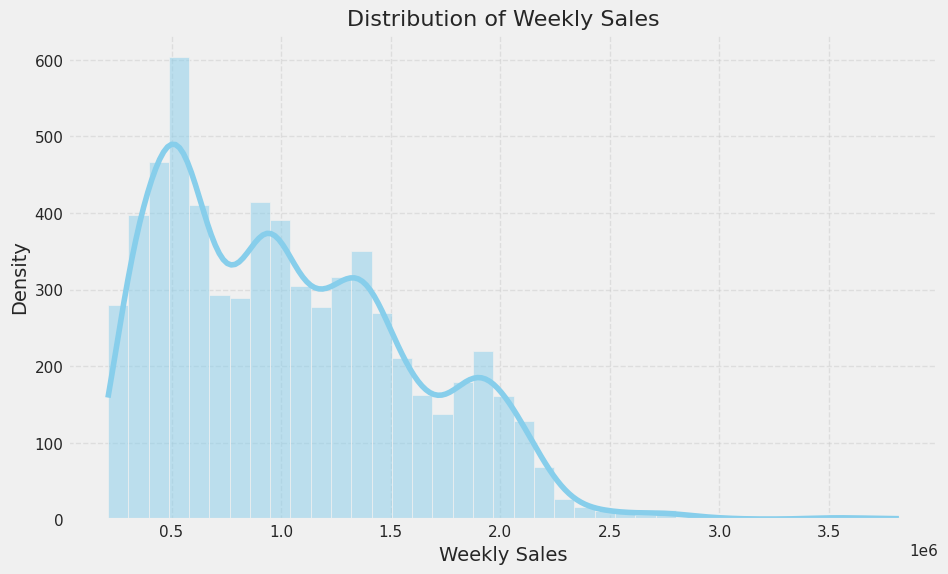

In [ ]:
# Set up the plot
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Weekly_Sales', kde=True, color='skyblue')

# Customize labels and title
plt.title('Distribution of Weekly Sales', fontsize=16)
plt.xlabel('Weekly Sales', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Customize grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Add annotations or additional customization as needed

# Show plot
plt.show()

In [ ]:

# Compute the total sales for each week
weekly_sales = df.groupby(['Date'])['Weekly_Sales'].sum().reset_index()

# Create the plot
fig = px.line(weekly_sales, x='Date', y='Weekly_Sales', title='Weekly Sales Trend', markers=True)

# Customize the layout
fig.update_layout(
    title={'text': 'Weekly Sales Trend', 'x': 0.5, 'xanchor': 'center', 'font': {'size': 24}},
    xaxis_title='Date',
    yaxis_title='Total Sales',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    font=dict(size=14),
    hovermode='x unified'
)

# Adding annotations for max and min sales
max_sales_date = weekly_sales['Date'][weekly_sales['Weekly_Sales'].idxmax()]
max_sales_value = weekly_sales['Weekly_Sales'].max()
min_sales_date = weekly_sales['Date'][weekly_sales['Weekly_Sales'].idxmin()]
min_sales_value = weekly_sales['Weekly_Sales'].min()

fig.add_trace(go.Scatter(
    x=[max_sales_date],
    y=[max_sales_value],
    mode='markers+text',
    text=['Max Sales'],
    textposition='top center',
    marker=dict(size=10, color='green'),
    showlegend=False
))

fig.add_trace(go.Scatter(
    x=[min_sales_date],
    y=[min_sales_value],
    mode='markers+text',
    text=['Min Sales'],
    textposition='bottom center',
    marker=dict(size=10, color='red'),
    showlegend=False
))

# Show the plot
fig.show()

In [ ]:
# Set the "Date" column as the index
df.set_index("Date", inplace=True)

# Resample the data to a monthly frequency and calculate the mean weekly sales for each month
monthly_sales = df["Weekly_Sales"].resample("M").mean().reset_index()

# Create the plot
fig = px.line(monthly_sales, x='Date', y='Weekly_Sales', title='Monthly Average Weekly Sales', markers=True)

# Customize the layout
fig.update_layout(
    title={'text': 'Monthly Average Weekly Sales', 'x': 0.5, 'xanchor': 'center', 'font': {'size': 24}},
    xaxis_title='Date',
    yaxis_title='Average Weekly Sales',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    font=dict(size=14),
    hovermode='x unified'
)

# Adding markers for each data point
fig.update_traces(marker=dict(size=8, color='blue', line=dict(width=2, color='DarkSlateGrey')))

# Adding annotations for max and min sales
max_sales_date = monthly_sales['Date'][monthly_sales['Weekly_Sales'].idxmax()]
max_sales_value = monthly_sales['Weekly_Sales'].max()
min_sales_date = monthly_sales['Date'][monthly_sales['Weekly_Sales'].idxmin()]
min_sales_value = monthly_sales['Weekly_Sales'].min()

fig.add_trace(go.Scatter(
    x=[max_sales_date],
    y=[max_sales_value],
    mode='markers+text',
    text=['Max Sales'],
    textposition='top center',
    marker=dict(size=10, color='green'),
    showlegend=False
))

fig.add_trace(go.Scatter(
    x=[min_sales_date],
    y=[min_sales_value],
    mode='markers+text',
    text=['Min Sales'],
    textposition='bottom center',
    marker=dict(size=10, color='red'),
    showlegend=False
))

# Show the plot
fig.show()

In [ ]:
# impact of different factor on sales
# Compute the correlation matrix
corr_matrix = df.select_dtypes(exclude='object').corr()

# Create a heatmap
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='Viridis',
    hoverongaps=False,
    colorbar=dict(title='Correlation')
))

# Add annotations
annotations = []
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        annotations.append(
            go.layout.Annotation(
                text=str(round(corr_matrix.iloc[i, j], 2)),
                x=corr_matrix.columns[j],
                y=corr_matrix.columns[i],
                xref='x1',
                yref='y1',
                showarrow=False,
                font=dict(color='white' if abs(corr_matrix.iloc[i, j]) > 0.5 else 'black')
            )
        )

fig.update_layout(
    title='Correlation Heatmap',
    annotations=annotations,
    xaxis=dict(tickangle=-45),
    yaxis=dict(tickangle=45)
)

# Show the plot
fig.show()

In [ ]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
# Combine the Sales of Walmart stores
f = df.groupby('Date')['Weekly_Sales'].sum()
df.head()

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
Name: Weekly_Sales, dtype: float64

# 5- Forcasting With Facebook Prophet Model

In [ ]:
# Sort the DataFrame by the datetime index
df = df.sort_index()

# Splitting the data
train_size = int(len(df) * 0.8)  # 80% for training
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [ ]:
# Format data for prophet model using ds and y
train_data.reset_index() \
    .rename(columns={'Date':'ds',
                     'Weekly_Sales':'y'}).head()

,ds,y
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30


In [ ]:

print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Training data shape: (114,)
Test data shape: (29,)


In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet
# Setup and train model and fit
model = Prophet(weekly_seasonality=True)
model.fit(train_data.reset_index() \
              .rename(columns={'Date':'ds',
                               'Weekly_Sales':'y'}))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8qpn_4p9/63fmsuld.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8qpn_4p9/2_fkg2sl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79311', 'data', 'file=/tmp/tmp8qpn_4p9/63fmsuld.json', 'init=/tmp/tmp8qpn_4p9/2_fkg2sl.json', 'output', 'file=/tmp/tmp8qpn_4p9/prophet_modelff1f4zim/prophet_model-20240717073831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:38:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Predict on training set with model
outputSales = model.predict(df=test_data.reset_index() \
                                   .rename(columns={'Date':'ds'}))

In [ ]:
outputSales.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-04-13,5.005763e+07,4.332693e+07,5.306108e+07,5.005762e+07,5.005763e+07,-1.654888e+06,-1.654888e+06,-1.654888e+06,-2.220753e+06,-2.220753e+06,-2.220753e+06,5.658645e+05,5.658645e+05,5.658645e+05,0.0,0.0,0.0,4.840274e+07
1,2012-04-20,5.006743e+07,4.252419e+07,5.262792e+07,5.006742e+07,5.006743e+07,-2.430201e+06,-2.430201e+06,-2.430201e+06,-2.220753e+06,-2.220753e+06,-2.220753e+06,-2.094478e+05,-2.094478e+05,-2.094478e+05,0.0,0.0,0.0,4.763723e+07
2,2012-04-27,5.007723e+07,4.088723e+07,5.116983e+07,5.007721e+07,5.007724e+07,-4.074085e+06,-4.074085e+06,-4.074085e+06,-2.220753e+06,-2.220753e+06,-2.220753e+06,-1.853332e+06,-1.853332e+06,-1.853332e+06,0.0,0.0,0.0,4.600314e+07
3,2012-05-04,5.008703e+07,4.021026e+07,5.030171e+07,5.008700e+07,5.008705e+07,-4.917304e+06,-4.917304e+06,-4.917304e+06,-2.220753e+06,-2.220753e+06,-2.220753e+06,-2.696551e+06,-2.696551e+06,-2.696551e+06,0.0,0.0,0.0,4.516972e+07
4,2012-05-11,5.009683e+07,4.094380e+07,5.050071e+07,5.009679e+07,5.009687e+07,-4.208120e+06,-4.208120e+06,-4.208120e+06,-2.220753e+06,-2.220753e+06,-2.220753e+06,-1.987367e+06,-1.987367e+06,-1.987367e+06,0.0,0.0,0.0,4.588871e+07


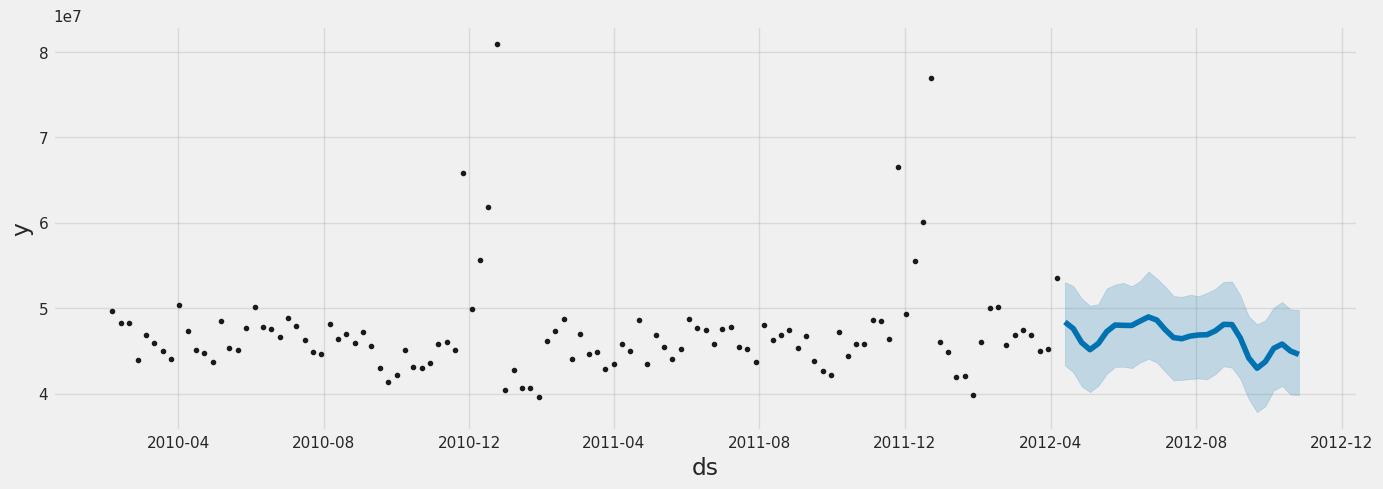

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(outputSales,
                 ax=ax)
plt.show()

* Forcasted Sale is shown with blue line

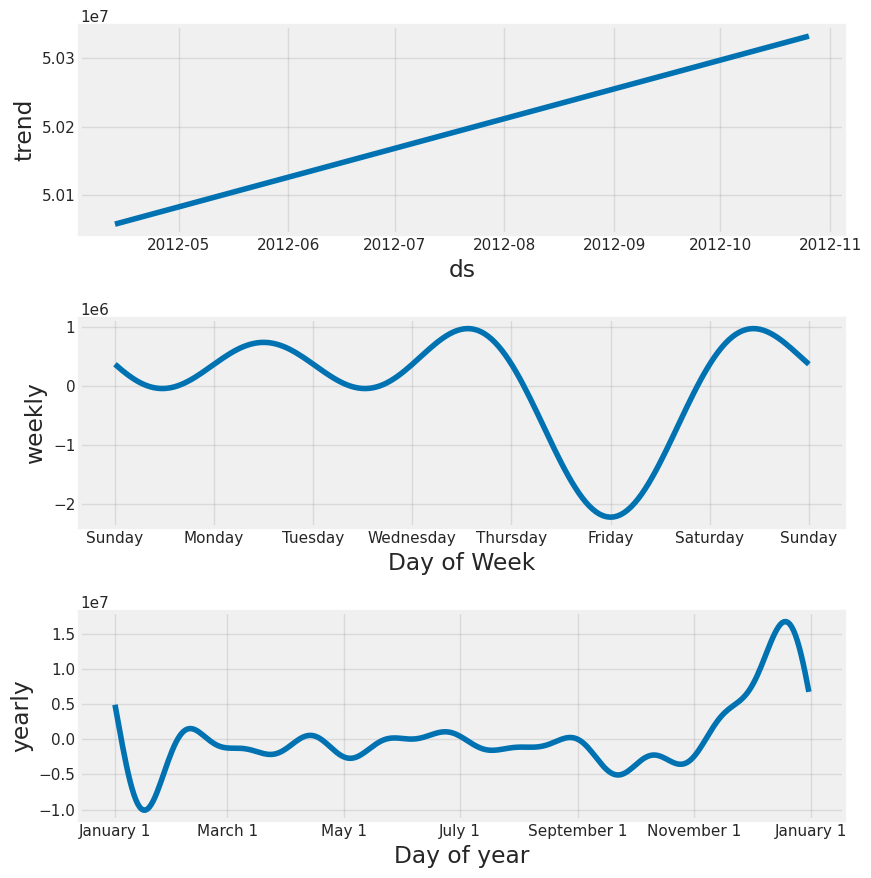

In [ ]:
# Plot the components of the model
fig = model.plot_components(outputSales)

* There is no significant seasonalit apart from the month of january that shows high walmart sales

* Friday shows signifcantly less sale as compared to other days of week

* From May 2020 to December there is an increase in Sales

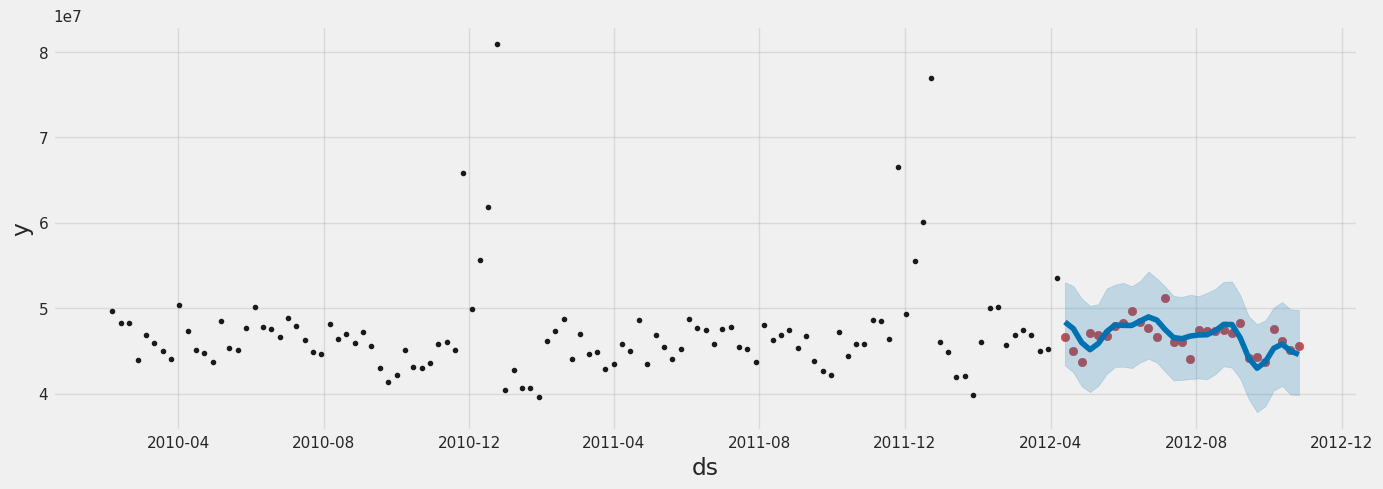

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(test_data.index, test_data.values, color='r')
fig = model.plot(outputSales, ax=ax)

* Red represent the actual values while the forcasted  Blue line is shown in the shaded area